How does Alcremie's attack damage compare to the other Fairy Type Pokemon? is the damage average, above average, below?

I will examine the entire Pokemon population and it will be an observation study on specifically Fairy Type Pokemon

Information about my data

Name: pokemonData

Who made it? Len Greski

Description: Repository containing generations 1 - 9 of basic Pokémon stats, courtesy of pokemondb.net.

Put together by this person he pulled data from pokemondb.net.and made it into a csv file to be downloaded. This dataset includes ID, Name, Form, Type, ect.

In [29]:
print(df.columns)

Index(['ID', 'Name', 'Form', 'Type1', 'Type2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation'],
      dtype='object')


In [12]:
#Imports important stuff I need
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
Pokemon_data_filename = 'Pokemon.csv'
Pokemon_data = pd.read_csv(Pokemon_data_filename)
df = Pokemon_data



Pokemon Types

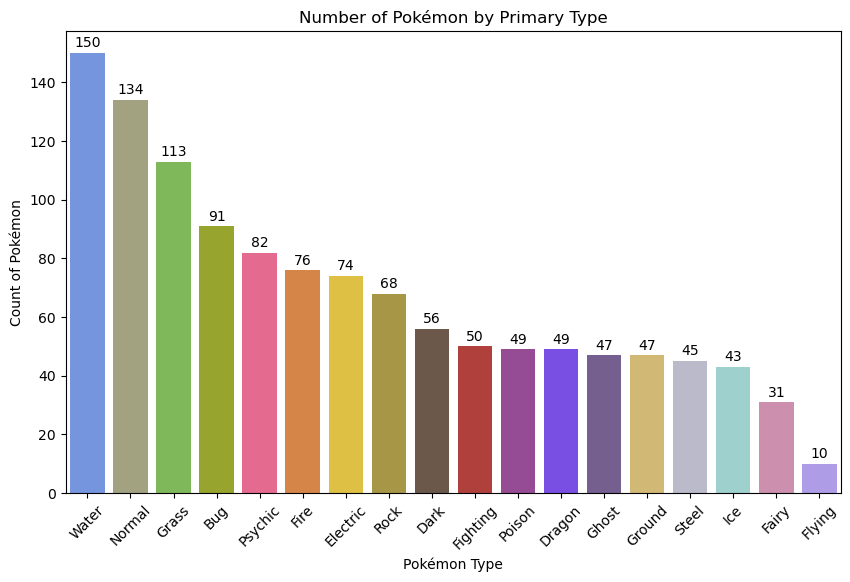

In [3]:
# Official Pokémon type colors
type_colors = {
    "Normal": "#A8A77A",
    "Fire": "#EE8130",
    "Water": "#6390F0",
    "Electric": "#F7D02C",
    "Grass": "#7AC74C",
    "Ice": "#96D9D6",
    "Fighting": "#C22E28",
    "Poison": "#A33EA1",
    "Ground": "#E2BF65",
    "Flying": "#A98FF3",
    "Psychic": "#F95587",
    "Bug": "#A6B91A",
    "Rock": "#B6A136",
    "Ghost": "#735797",
    "Dragon": "#6F35FC",
    "Dark": "#705746",
    "Steel": "#B7B7CE",
    "Fairy": "#D685AD"
}

# Count Pokémon by primary type
type_counts = df['Type1'].value_counts().reset_index()
type_counts.columns = ["Type", "Count"]

# Match colors to types
palette = [type_colors[t] for t in type_counts["Type"]]

# Plot (vertical)
plt.figure(figsize=(10,6))
sns.barplot(
    x="Type", 
    y="Count", 
    data=type_counts, 
    palette=palette
)

# Titles and labels
plt.title("Number of Pokémon by Primary Type")
plt.xlabel("Pokémon Type")
plt.ylabel("Count of Pokémon")
plt.xticks(rotation=45)

# Show counts on bars
for i, v in enumerate(type_counts["Count"]):
    plt.text(i, v + 2, str(v), ha='center')

plt.show()


Fairy Type Attack Values

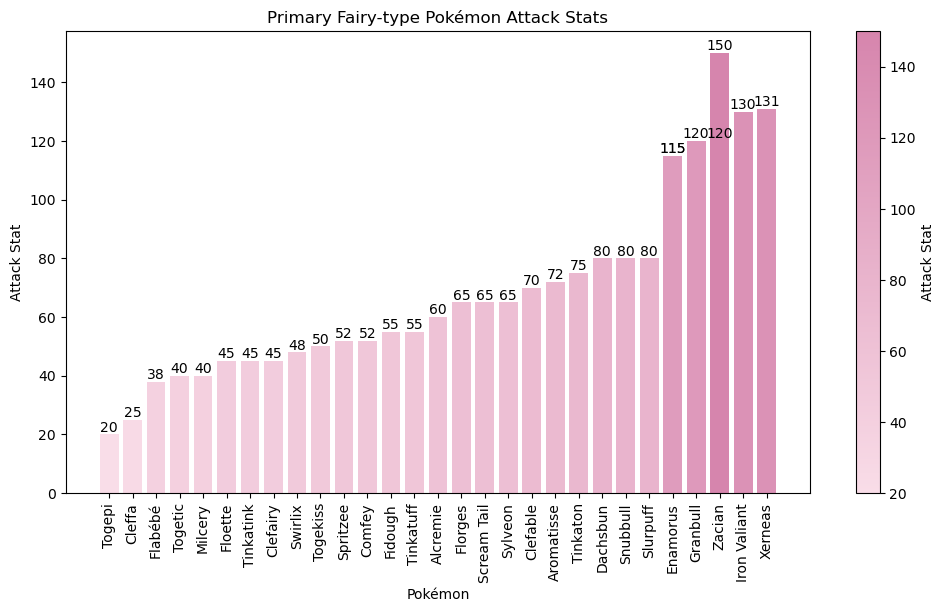

In [4]:
# Filter for ONLY primary Fairy types and sort by Attack (ascending)
fairy_pokemon = df[df["Type1"] == "Fairy"].sort_values(by="Attack").reset_index(drop=True)

# Gradient colors
base_color = "#D685AD"  # official Fairy pink
cmap = mcolors.LinearSegmentedColormap.from_list("fairy_gradient", ["#F9DDE8", base_color])

# Normalize Attack values to [0,1] range for coloring
norm = plt.Normalize(fairy_pokemon["Attack"].min(), fairy_pokemon["Attack"].max())
colors = [cmap(norm(val)) for val in fairy_pokemon["Attack"]]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Plot bar chart with gradient colors
bars = ax.bar(fairy_pokemon["Name"], fairy_pokemon["Attack"], color=colors)

# Titles and labels
ax.set_title("Primary Fairy-type Pokémon Attack Stats")
ax.set_xlabel("Pokémon")
ax.set_ylabel("Attack Stat")
plt.xticks(rotation=90)

# Show values on bars
for bar, val in zip(bars, fairy_pokemon["Attack"]):
    ax.text(bar.get_x() + bar.get_width()/2, val + 1, str(val), ha='center')

# Legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Attack Stat")

plt.show()

Measure of Central Tendency

In [39]:
fairy_mean_attack = fairy_pokemon["Attack"].mean()
print("Mean Attack stat of primary Fairy-type Pokémon:", fairy_mean_attack)
fairy_median_attack = fairy_pokemon["Attack"].median()
print("Median Attack stat of primary Fairy-type Pokémon:", fairy_median_attack)
fairy_mode_attack = fairy_pokemon["Attack"].mode()
print("Mode Attack stat of primary Fairy-type Pokémon:", fairy_mode_attack)

Mean Attack stat of primary Fairy-type Pokémon: 71.06451612903226
Median Attack stat of primary Fairy-type Pokémon: 65.0
Mode Attack stat of primary Fairy-type Pokémon: 0    45
1    65
2    80
Name: Attack, dtype: int64


Measures of Spread

In [5]:
# Calculates measures of spread for Attack stat (Fairy-type Pokémon)
attack_stats = fairy_pokemon["Attack"]

spread_measures = {
    "Minimum": attack_stats.min(),
    "Maximum": attack_stats.max(),
    "Range": attack_stats.max() - attack_stats.min(),
    "Standard Deviation": attack_stats.std(),
    "Q1 (25%)": attack_stats.quantile(0.25),
    "Q3 (75%)": attack_stats.quantile(0.75),
    "IQR (Q3 - Q1)": attack_stats.quantile(0.75) - attack_stats.quantile(0.25)
}

for k, v in spread_measures.items():
    print(f"{k}: {v}")


Minimum: 20
Maximum: 150
Range: 130
Standard Deviation: 33.88503650469822
Q1 (25%): 46.5
Q3 (75%): 80.0
IQR (Q3 - Q1): 33.5


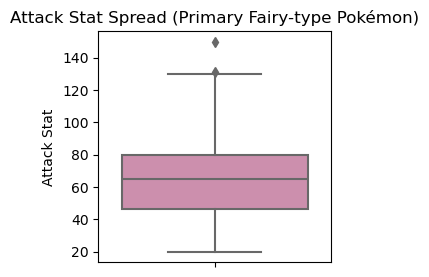

In [11]:
fairy_pokemon = df[df["Type1"] == "Fairy"]

plt.figure(figsize=(3,3))
sns.boxplot(y=fairy_pokemon["Attack"], color="#D685AD")

plt.title("Attack Stat Spread (Primary Fairy-type Pokémon)")
plt.ylabel("Attack Stat")
plt.show()


Conclusion:
How does Alcremie's attack damage compare to the other Fairy Type Pokemon? is the damage average, above average, below?

Alcremie's attack damage is below average compared to the other Fairy type Pokemon with an attack stat of 60 This lies in the Quartile 1 range. Alcremie however lays right below the median which is 65 and close to the mean which is 71.1. Alcremie by far isn't the weakest Fairy type which is given to Togepi but also not the strongest in attack which is given too Xerneas.

From this data I can conclude that Alcremie's attack damage is below average compared to other Fairy type 1 Pokemon